Density-Based Spatial Clustering of Application with Noise (DBSCAN) is an unsupervised clustering algorithm that groups data points based on density. It's advantages over centroid-based clustering algorithms is that it can find arbitary-shaped clusters and handles noise well by labeling low density areas as outliers.

It does this by finding all points within a defined neighbourhood of each point. Core points are those with at least the defined minimun of neighbours in their radius. Those that are within the radius of a core point, but do not have enough neightbours in their radius, count towards the cluster but cannot expand it.


**Psuedo Code:**
    
    for point in dataset:
        if point has a label:
            move to next point
        if count_neightbours(point, radius) less than minimum samples:
            label point as noise
        else:
            create new cluster
            assign core label and cluster index to point
            for neighbour in neighbours(point, radius):
                label neighbour as cluster
                if count_neightbours(point neighbour, radius) is more or equal to minimum samples:
                    assign core label and cluster index to point
                    expand search from new core point
                else:
                    assign border label and cluster index
                  

###DBScan with NumPy

In [1]:
import numpy as np

class DBSCAN_np:
    def __init__(self, min_samples, epsilon):
        self.min_samples = min_samples
        self.epsilon = epsilon
        self.predicted_labels = None

    def find_neighbours(self, point_index, X):
        neighbours = []
        for neighbour_index in range(len(X)):
            # Points are not the same index and euclidean distance is less that epsilon
            if neighbour_index != point_index and np.linalg.norm(X[point_index] - X[neighbour_index]) < self.epsilon:
                neighbours.append(neighbour_index)
        return neighbours

    def is_core_point(self, point_index, X):
        return len(self.find_neighbours(point_index, X)) >= self.min_samples

    def visit_neighbours(self, point_index, X, cluster_index):
        for neighbour_index in self.find_neighbours(point_index, X):
            if self.predicted_labels[neighbour_index] == 0:
                self.predicted_labels[neighbour_index] = cluster_index
                # If neighbour is core point, repeat until border point is found
                if self.is_core_point(neighbour_index, X):
                    self.visit_neighbours(neighbour_index, X, cluster_index)

    def run_clustering(self, X):
        cluster_index = 1
        self.predicted_labels = np.zeros(X.shape[0])
        for point_index in range(len(X)):
            if self.predicted_labels[point_index] != 0:
                continue
            if self.is_core_point(point_index, X):
                self.predicted_labels[point_index] = cluster_index
                self.visit_neighbours(point_index, X, cluster_index)
                cluster_index += 1
        return self.predicted_labels

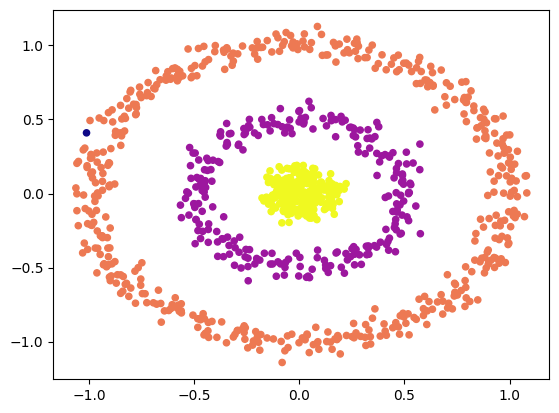

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# generate concentric circles
X1, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)
X2, _ = make_circles(n_samples=500, factor=0.1, noise=0.05)
X = np.vstack((X1, X2))

labels_np = DBSCAN_np(min_samples=5, epsilon=0.1).run_clustering(X)

scatter = plt.scatter(X[:,0], X[:,1], c=labels_np, cmap="plasma", s=20)
plt.show()

Below is a comparison to the sklearn import

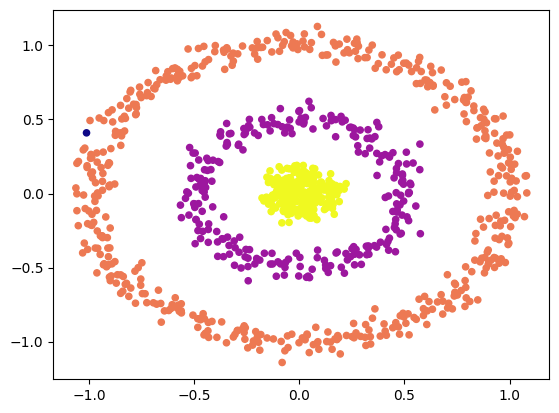

In [3]:
from sklearn.cluster import DBSCAN

labels_sk = DBSCAN(min_samples=5, eps=0.1).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_sk, cmap="plasma", s=20)
plt.show()

The circles data set highlights the strength of the DBSCAN algorithm in clustering arbitary-shapred clusters. A centroid clustering method would fail miserably with this problem.